# Bike Sharing Analysis with Ford GoBike Data
## by Juliane Bilda


## Introduction

Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('202008-baywheels-tripdata.csv')

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,NaN,Illinois St at 20th St,376.0,37.790000,-122.420000,37.760320,-122.387456,casual
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,NaN,24th St at Chattanooga St,132.0,37.750000,-122.410000,37.751798,-122.426539,casual
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,355.0,Jackson Playground,115.0,37.755426,-122.388588,37.764950,-122.398857,casual
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,71.0,Pierce St at Haight St,73.0,37.773053,-122.439103,37.771924,-122.433821,casual
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,71.0,NaN,NaN,37.773232,-122.439135,37.770000,-122.490000,casual


In [4]:
df.shape

(152446, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152446 entries, 0 to 152445
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             152446 non-null  object 
 1   rideable_type       152446 non-null  object 
 2   started_at          152446 non-null  object 
 3   ended_at            152446 non-null  object 
 4   start_station_name  104206 non-null  object 
 5   start_station_id    104206 non-null  float64
 6   end_station_name    101349 non-null  object 
 7   end_station_id      101349 non-null  float64
 8   start_lat           152446 non-null  float64
 9   start_lng           152446 non-null  float64
 10  end_lat             152246 non-null  float64
 11  end_lng             152246 non-null  float64
 12  member_casual       152446 non-null  object 
dtypes: float64(6), object(7)
memory usage: 11.0+ MB


In [6]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,104206.000000,101349.000000,152446.000000,152446.000000,152246.000000,152246.000000
mean,224.407261,220.555881,37.729328,-122.355459,37.729155,-122.350376
std,173.466608,174.087160,0.142196,0.171591,0.172028,0.681279
min,3.000000,3.000000,37.240000,-122.510000,0.000000,-122.510000
25%,72.000000,72.000000,37.760000,-122.433280,37.760000,-122.432642
50%,145.000000,139.000000,37.773571,-122.413371,37.773556,-122.413200
75%,386.000000,384.000000,37.787883,-122.392553,37.788160,-122.392673
max,538.000000,538.000000,37.880222,-121.770000,37.880222,0.000000


In [7]:
# Checking for missing values
df.isna().sum()

# We can see that some start_station and end_station data is missing as well as end_latitude and end_longitude values

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    48240
start_station_id      48240
end_station_name      51097
end_station_id        51097
start_lat                 0
start_lng                 0
end_lat                 200
end_lng                 200
member_casual             0
dtype: int64

In [8]:
# Checking if there are duplicates in the dataset
df.duplicated().sum()

# Zero duplicates in the dataset

0

In [9]:
df.member_casual.value_counts()

casual    90548
member    61898
Name: member_casual, dtype: int64

In [10]:
# Checking for the earliest bike ride
df.started_at.min()

'2020-08-01 00:00:13'

In [11]:
# Checking for the latest bike ride in the dataset
df.started_at.max()

'2020-08-31 23:57:21'

#### Data Cleaning

Before assessing the data to draw conclusions, there are some quality issues (this dataset is tidy) that need to be cleaned:

- Start/end times are not in the timestamp format
- The following columns are not in object format: start_station_id, end_station_id
- Change member_casual into categorical

In [12]:
# Create a copy of the dataset for further cleaning steps
df_clean = df.copy()

In [13]:
# Change 'started_at' and 'ended_at' to datetime format
df_clean.started_at = pd.to_datetime(df_clean.started_at)
df_clean.ended_at = pd.to_datetime(df_clean.ended_at)

In [14]:
# Change 'start_station_id' and 'end_station_id' to object format
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

In [15]:
# Change 'member_casual' into category
def change_to_category(df,fields):
    for field in fields:
        df[field] = df[field].astype('category')
    return df

In [16]:
df_clean = change_to_category (df_clean,['member_casual'])

In [17]:
# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152446 entries, 0 to 152445
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             152446 non-null  object        
 1   rideable_type       152446 non-null  object        
 2   started_at          152446 non-null  datetime64[ns]
 3   ended_at            152446 non-null  datetime64[ns]
 4   start_station_name  104206 non-null  object        
 5   start_station_id    152446 non-null  object        
 6   end_station_name    101349 non-null  object        
 7   end_station_id      152446 non-null  object        
 8   start_lat           152446 non-null  float64       
 9   start_lng           152446 non-null  float64       
 10  end_lat             152246 non-null  float64       
 11  end_lng             152246 non-null  float64       
 12  member_casual       152446 non-null  category      
dtypes: category(1), datetime64[ns

In [18]:
# Extract dayofweek, hours information from the start_time
df_clean['start_time_dayofweek']= df_clean['started_at'].dt.strftime('%a')
df_clean['start_time_hour']= df_clean['started_at'].dt.hour

In [19]:
# Calculating the duration in minutes of each bike ride
df_clean['duration'] = df_clean['ended_at']-df_clean['started_at']

In [20]:
df_clean['duration_sec'] = df_clean['duration'].dt.seconds
df_clean['duration_min'] = (df_clean['duration_sec']/60).astype(int)

In [21]:
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time_dayofweek,start_time_hour,duration,duration_sec,duration_min
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,nan,Illinois St at 20th St,376.0,37.790000,-122.420000,37.760320,-122.387456,casual,Fri,9,00:22:42,1362,22
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,nan,24th St at Chattanooga St,132.0,37.750000,-122.410000,37.751798,-122.426539,casual,Thu,18,00:09:52,592,9
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,355.0,Jackson Playground,115.0,37.755426,-122.388588,37.764950,-122.398857,casual,Fri,9,00:06:35,395,6
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,71.0,Pierce St at Haight St,73.0,37.773053,-122.439103,37.771924,-122.433821,casual,Fri,11,00:02:23,143,2
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,71.0,NaN,nan,37.773232,-122.439135,37.770000,-122.490000,casual,Fri,8,00:14:43,883,14


### What is the structure of your dataset?

The FordGoBike dataset contains 152.446 entries of bike rides that happened in August 2020. The dataframe consists of 13 columns including the data types object, datetime, float and category:

- ride_id 
- rideable_type
- started_at
- ended_at
- start_station_name
- start_station_id
- end_station_name
- end_station_id
- start_lat
- start_lng
- end_lat
- end_lng  
- member_casual 

I added the columns:

- start_time_dayofweek
- start_time_hour
- duration
- duration_min
- duration_sec


### What is/are the main feature(s) of interest in your dataset?

- start_time_dayofweek, start_time_hour: Can be used to explore when bikes are in high or low demand
- member_casual: Can be used to explore the differences in member and casual user behaviour and to understand the consumer better
 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The time related data as well as the user related data will help me to investigate into my features of interest. Unfortunately there is no more customer data provided in the dataset, such as gender or age.  

## Univariate Exploration

### Amount of Member vs. Casual Customer

In [22]:
df_clean.member_casual.value_counts()

casual    90548
member    61898
Name: member_casual, dtype: int64

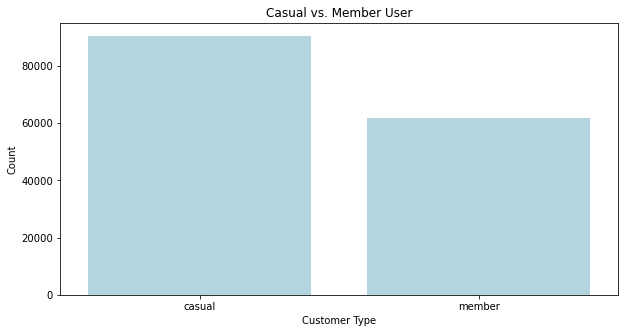

In [23]:
plt.figure(figsize=(10,5))
base_color = sb.color_palette()[0]
graph = sb.countplot(data = df_clean, x ='member_casual', color = 'lightblue');
graph.set_title("Casual vs. Member User")
graph.set_xlabel("Customer Type")
graph.set_ylabel("Count");

We can see from the figure above that there were more than 80.000 people who casualy rent a bike, while about 60.000 Ford GoBike members used the service in August 2020.

### Electric vs. Docked Bike

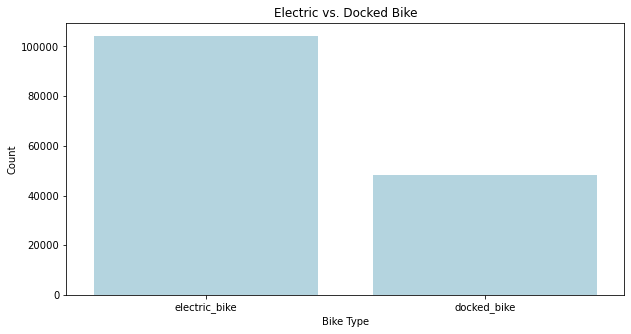

In [24]:
plt.figure(figsize=(10,5))
base_color = sb.color_palette()[0]
graph = sb.countplot(data = df_clean, x ='rideable_type', color = 'lightblue');
graph.set_title("Electric vs. Docked Bike")
graph.set_xlabel("Bike Type")
graph.set_ylabel("Count");

More than 100.000 electric bikes where used, whereas only 50.000 docked bikes were used in August 2020.

### Ford GoBike Usage by Day

In [25]:
df_clean['start_time_dayofweek'].value_counts()

Sat    31282
Sun    25025
Fri    21349
Mon    20584
Thu    18855
Tue    17774
Wed    17577
Name: start_time_dayofweek, dtype: int64

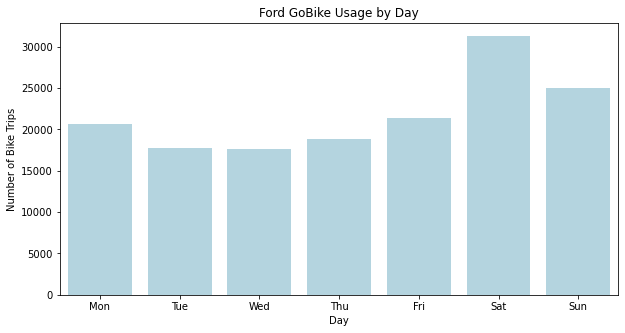

In [26]:
# Daily usage of the Ford Go Bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10,5))
graph2 = sb.countplot(data = df_clean, x = 'start_time_dayofweek', order = weekday, color = 'lightblue')
graph2.set_title("Ford GoBike Usage by Day")
graph2.set_xlabel('Day')
graph2.set_ylabel('Number of Bike Trips');

Saturdays and Sundays seem to be the most popular weekdays for using the bike sharing service. This shows that the bike sharing service is particularly used for weekend activities. On Tuesdays and Wednesdays the demand for bike sharing service is lowest. 

### Ford GoBike Usage by Hour

In [27]:
df_clean['start_time_hour'].value_counts()

17    14630
18    13653
16    13155
15    12235
14    11689
13    10950
19    10717
12    10302
11     8860
10     7289
20     6913
9      6345
8      5335
21     4341
7      3892
22     3250
23     2102
6      2016
0      1327
1       935
5       745
2       665
3       574
4       526
Name: start_time_hour, dtype: int64

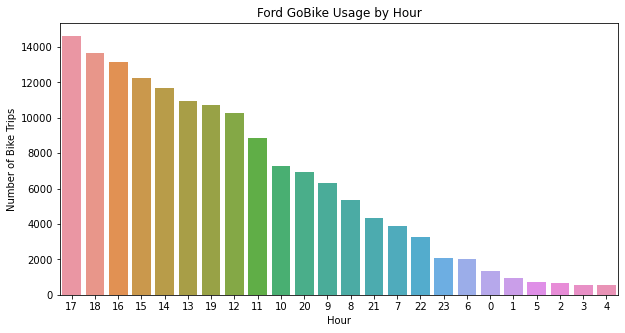

In [28]:
# Usage of the Ford Go Bike system by Hour
plt.figure(figsize=(10,5))
graph3 = sb.countplot(data = df_clean, x = 'start_time_hour', order = df_clean['start_time_hour'].value_counts().index);
graph3.set_title("Ford GoBike Usage by Hour")
graph3.set_xlabel('Hour')
graph3.set_ylabel('Number of Bike Trips');

Bikes were mostly used in the late afternoon and evening hours (4-6pm). Also the demand for the bike sharing service is high around lunch time (12am). 

### Ford GoBike Usage in Minutes

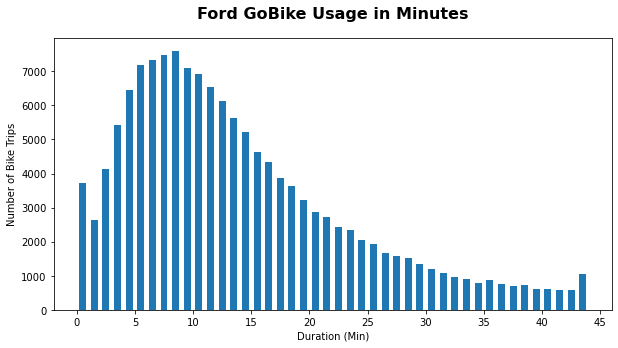

In [29]:
# Duration of the bike rides -in MINUTES
plt.figure(figsize=(10,5))
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike Usage in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

Looking at the histogram most bike rides have a duration between 5 to 10 minutes. We can suggest that customers mainly use the bike sharing service for short distances.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

No, there were no big surprises during the exploratory and visualization phase.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, I performed several cleaning operations on the data. I extracted the day of week and hours information from the start_time data in order to be able to better analyze the demand of bike sharing service regarding weekdays and hours. 
Moreover, I changed datatypes on variables from float to strings as we do not need them for calculations.

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the data.

### Ford GoBike - Amount of Members vs. Casual Customers across Weekdays

<Figure size 864x360 with 0 Axes>

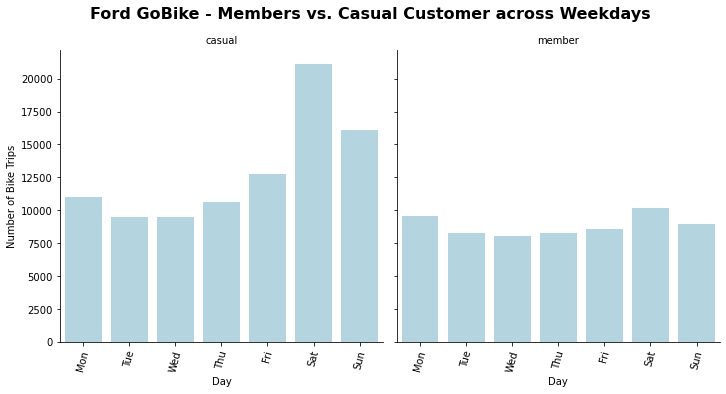

In [30]:
# Customer Usage by Day vs. Casual Usage by Day
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df_clean, x='start_time_dayofweek', col="member_casual", order = weekday, kind='count', color = 'lightblue')

graph.set_axis_labels("Day", "Number of Bike Trips")
graph.set_titles("{col_name}")

graph.fig.suptitle('Ford GoBike - Members vs. Casual Customer across Weekdays', y=1.05, fontsize=16, fontweight='bold')
graph.set_xticklabels(rotation=75);

Members are using Ford GoBike system constantly over the week with slightly rising usage on Saturdays and Mondays. Casual users instead are using Ford GoBike on Saturdays the most with more than 20.000 bike rides. Compared to Tuesdays and Wednesdays the usage of Ford GoBike is twice as high on Saturdays for casual customers.

### Ford Go Bike - Duration (Min) by Customer Type

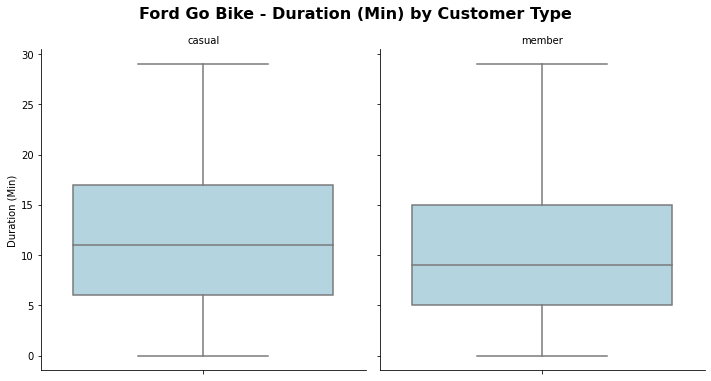

In [31]:
data = df_clean.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="member_casual", kind='box', color = 'lightblue')

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford Go Bike - Duration (Min) by Customer Type', y=1.05, fontsize=16, fontweight='bold');

Casual customers usually have longer bike rides (6-18 minutes) than member customers (5-15 minutes). Casual customers ride the bikes for longer than 10 minutes on average, whereas member customers use the bikes shorter than 10 minutes on average. 

### How did the feature(s) of interest vary with other features in the dataset?

#### casual users are:
- more likely to use Ford GoBike on weekends, especially on Saturdays
- more likely to do short trips about 6-18 minutes

#### member users are:
- more likely to use Ford GoBike constantly on every weekday with a slightly higher demand on Saturdays
- more likely to do short trips about 5-15 minutes

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I did not expect that member users show such a similar usage of Ford GoBike bikes through every day of the week. I would have expected an noticeable rise in usage on Saturdays and Sundays. 

## Multivariate Exploration

> In this section, I created plots of three or more variables to investigate the data even further. 

### Usage (min) per Customer Type and Weekday

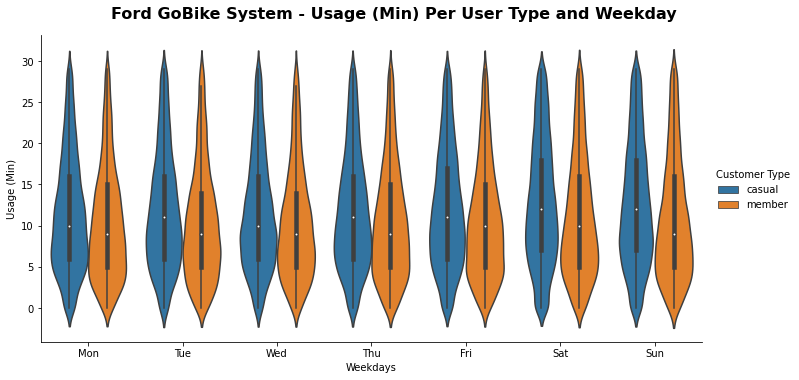

In [32]:
# Violinplot - duration (min) per user type per weekday
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

data = df_clean.query('duration_min < 30')
graph = sb.catplot(data=data, x='start_time_dayofweek', y="duration_min", hue="member_casual", order = weekday, kind="violin", height=5, aspect=2);

graph.set_axis_labels("Weekdays", "Usage (Min)")
graph._legend.set_title('Customer Type')
graph.fig.suptitle('Ford GoBike System - Usage (Min) Per User Type and Weekday', y=1.05, fontsize=16, fontweight='bold');

It is noticeable that in general member users take shorter trips than casual users through every day of the week. Especially on Saturdays members users take shorter trips (around 5 minutes) than casual users, whereas casual users rent the bikes the longest compared to remaining weekdays.   

### Usage (min) per Customer Type per Bike Type

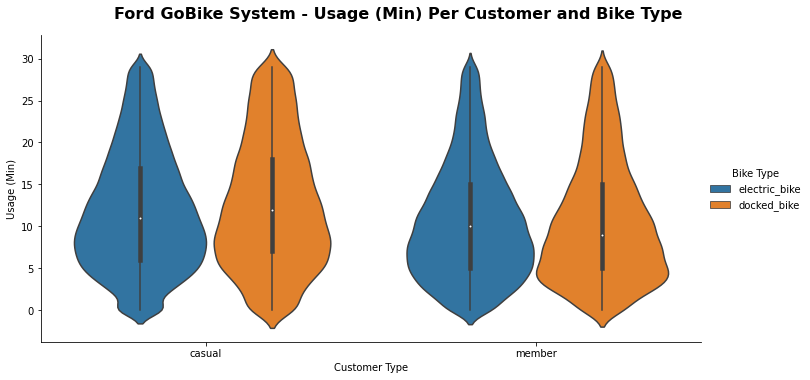

In [33]:
# Violinplot - duration (min) per user type per bike type
data = df_clean.query('duration_min < 30')
graph = sb.catplot(data=data, x='member_casual', y="duration_min", hue="rideable_type", kind="violin", height=5, aspect=2);

graph.set_axis_labels("Customer Type", "Usage (Min)")
graph._legend.set_title('Bike Type')
graph.fig.suptitle('Ford GoBike System - Usage (Min) Per Customer and Bike Type', y=1.05, fontsize=16, fontweight='bold');

We can see that casual users take more electric bikes than docked bikes. Member users take more electric than docked bikes as well. Compared to casual users more member users take docked bikes for short rides around 5 minutes.

### Usage (Min) per Customer Type across Weekdays

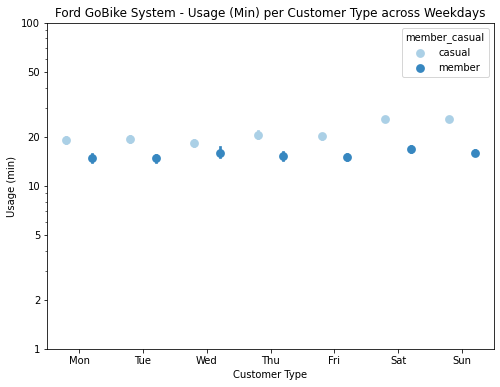

In [34]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig = plt.figure(figsize = [8,6]);
ax = sb.pointplot(data = df_clean, x = 'start_time_dayofweek', y = 'duration_min', hue = 'member_casual', order = weekday,
                  palette = 'Blues', linestyles = '', dodge = 0.4);

plt.title('Ford GoBike System - Usage (Min) per Customer Type across Weekdays');
plt.ylabel('Usage (min)');
plt.xlabel('Customer Type')
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

The graph above clearly shows that member customers have a shorter usage duration than casual members across all weekdays. while the usage duration of casual customers is around 20 minutes or longer on weekends, member customers use the bikes less than 20 minutes - even on weekends. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### casual users:
- are more likely to rent the Ford GoBike bikes for a longer timeperiod throughout every day of the week
- are more likely to rent the bikes the longest on Saturdays
- have used more electric bikes than docked bikes for short trips
- have used more docked bikes than electric bikes for longer trips
- may rent the Ford GoBike bikes even longer than one day on Saturdays and Sundays 

#### member users:
- are more likely to take short trips with Ford GoBike bikes through every day of the week
- take the shortest trips with Ford GoBike bikes on Tuesdays, Wednesdays and Thursdays on average
- have used more docked bikes than electric bikes for short trips around 5 minutes
  

In [35]:
df_clean.to_csv("master_data_frame.csv", sep=',', encoding='utf-8')